In [5]:
!kaggle datasets list -s "Berlin Airbnb Data"

ref                                               title                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ------------------------------  -----  -------------------  -------------  ---------  ---------------  
brittabettendorf/berlin-airbnb-data               Berlin Airbnb Data               88MB  2019-03-05 09:23:00          14171        399  0.8235294        
thoroc/edinburgh-inside-airbnb                    Edinburgh Inside Airbnb         174MB  2019-08-24 05:44:33            174         10  0.7058824        
barelydedicated/airbnb-duplicate-image-detection  AirBnB Duplicate Image Dataset  104MB  2019-12-20 04:10:34            158          7  0.8125           
raghavs1003/airbnb-berlin-2020                    Airbnb Berlin 2020              108MB  2020-09-22 10:11:40             52          0  0.5882353        
milorico/airbnb                                   Airbnb                    

In [1]:
!kaggle datasets download -d "brittabettendorf/berlin-airbnb-data"


  0%|          | 0.00/87.7M [00:00<?, ?B/s]
  1%|1         | 1.00M/87.7M [00:00<00:12, 7.45MB/s]
  2%|2         | 2.00M/87.7M [00:00<00:11, 8.12MB/s]
  5%|4         | 4.00M/87.7M [00:00<00:09, 8.95MB/s]
  7%|6         | 6.00M/87.7M [00:00<00:08, 9.65MB/s]
  9%|9         | 8.00M/87.7M [00:00<00:08, 9.46MB/s]
 11%|#1        | 10.0M/87.7M [00:00<00:07, 10.4MB/s]
 13%|#2        | 11.0M/87.7M [00:01<00:10, 7.97MB/s]
 15%|#4        | 13.0M/87.7M [00:01<00:09, 8.51MB/s]
 16%|#5        | 14.0M/87.7M [00:01<00:09, 8.30MB/s]
 17%|#7        | 15.0M/87.7M [00:01<00:08, 8.57MB/s]
 19%|#9        | 17.0M/87.7M [00:01<00:08, 8.87MB/s]
 21%|##        | 18.0M/87.7M [00:01<00:08, 8.78MB/s]
 23%|##2       | 20.0M/87.7M [00:02<00:07, 9.85MB/s]
 24%|##3       | 21.0M/87.7M [00:02<00:07, 9.86MB/s]
 25%|##5       | 22.0M/87.7M [00:02<00:07, 9.48MB/s]
 27%|##7       | 24.0M/87.7M [00:02<00:06, 10.2MB/s]
 30%|##9       | 26.0M/87.7M [00:02<00:06, 10.0MB/s]
 32%|###1      | 28.0M/87.7M [00:02<00:05, 10.8MB/s]
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df_listing = pd.read_csv("listings.csv")
df_listing["neighbourhood_group"] = df_listing["neighbourhood_group"].str.replace(" ", "")

In [4]:
# Converting feature data types to categorical for future machine learning Analysis
df_listing[["neighbourhood_group", "neighbourhood", "room_type"]] = df_listing[["neighbourhood_group", "neighbourhood", "room_type"]].astype("category")
df_listing .head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof-Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [5]:
# removing Outliers 
df_listing = df_listing[(0 < df_listing["price"])  & (df_listing["price"] < 1000)]
# Getting average Prices of Berlin Data sets
df_listing["price_ratio"] = (df_listing["price"]-df_listing["price"].min())/(df_listing["price"].max()-df_listing["price"].min())


In [6]:
berlin_lat = df_listing["latitude"].mean()
berlin_long = df_listing["longitude"].mean()
colors = ["#3333DD", "#B00000"]

In [7]:
berlin_map = folium.Map(location=[berlin_lat, berlin_long], zoom_start=11)

belin_boroughs = "https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson"
berlin_price = df_listing.groupby(by="neighbourhood_group").median().reset_index()

folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=berlin_price,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend = "Median Price (Euro)"
).add_to(berlin_map)

folium.LayerControl().add_to(berlin_map)

berlin_map

Text(0.5, 1.0, 'Berlin AirBnB Price distribution')

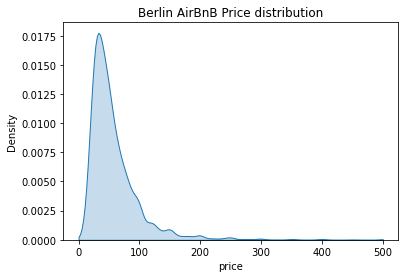

In [8]:
sns.kdeplot(df_listing["price"], shade=True, clip=(0, 500))
plt.title("Berlin AirBnB Price distribution")

<AxesSubplot:title={'center':'Number of offers per Neighbourhood'}, xlabel='neighbourhood_group'>

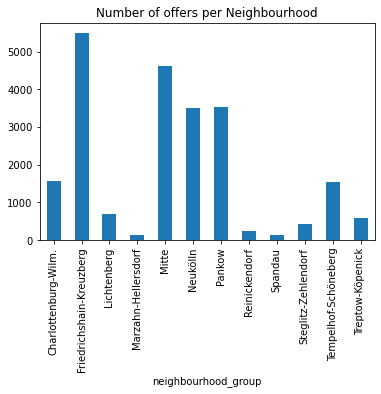

In [9]:
df_listing.groupby(by="neighbourhood_group").id.count().plot(kind="bar", title="Number of offers per Neighbourhood")

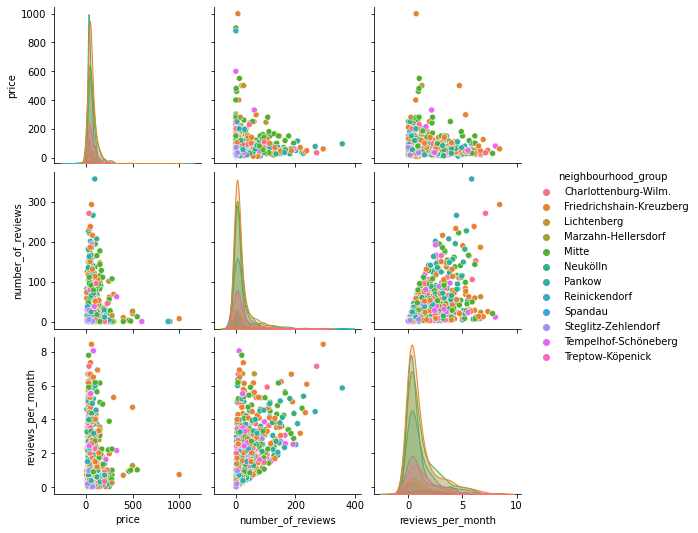

In [12]:
features = ["neighbourhood_group", "room_type", "price", "number_of_reviews", "reviews_per_month"]
sns.pairplot(df_listing[features].sample(2000), hue="neighbourhood_group")

C:\Users\uapug\Documents\anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
C:\Users\uapug\Documents\anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **artist_kws)
C:\Users\uapug\Documents\anaconda\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
C:\Users\uapug\Documents\anaconda\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

Text(0.5, 1.0, 'AirBnB Price per Neighbourhood Berlin')

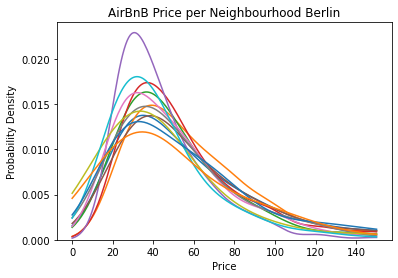

In [16]:
for hood in df_listing.neighbourhood_group.unique():
    sns.kdeplot(df_listing[df_listing.neighbourhood_group==hood].price, shade=False, clip=(0, 150), Label=hood)

  
plt.xlabel('Price') 
plt.ylabel('Probability Density') 
plt.title('AirBnB Price per Neighbourhood Berlin')


In [16]:
import requests
from bs4 import BeautifulSoup

In [35]:
wiki_pop = "https://de.wikipedia.org/wiki/Berlin"
response = requests.get(wiki_pop)
table_class = "wikitable zebra sortable"
soup = BeautifulSoup(response.text,"html.parser")
Berlin_population = soup.find("table", {"class":table_class})
df_pop = pd.read_html(str(Berlin_population))
df_pop

[     Nr.           Bezirk von Berlin Einwohner[Anm. 1]  Flächein km²  \
 0    1.0                       Mitte           385.748          3947   
 1    2.0    Friedrichshain-Kreuzberg           290.386          2034   
 2    3.0                      Pankow           409.335         10307   
 3    4.0  Charlottenburg-Wilmersdorf           343.592          6472   
 4    5.0                     Spandau           245.197          9187   
 5    6.0         Steglitz-Zehlendorf           310.071         10256   
 6    7.0        Tempelhof-Schöneberg           350.984          5310   
 7    8.0                    Neukölln           329.917          4493   
 8    9.0            Treptow-Köpenick           273.689         16842   
 9   10.0         Marzahn-Hellersdorf           269.967          6178   
 10  11.0                 Lichtenberg           294.201          5212   
 11  12.0               Reinickendorf           266.408          8931   
 12   NaN        Land Berlin (gesamt)       3.669.4

In [ ]:





df_pop = pd.read_html(str(Berlin_population))